In [1]:
import cv2
import numpy as np
from matplotlib import pyplot
%matplotlib inline
pyplot.rcParams['figure.figsize'] = [24, 16]

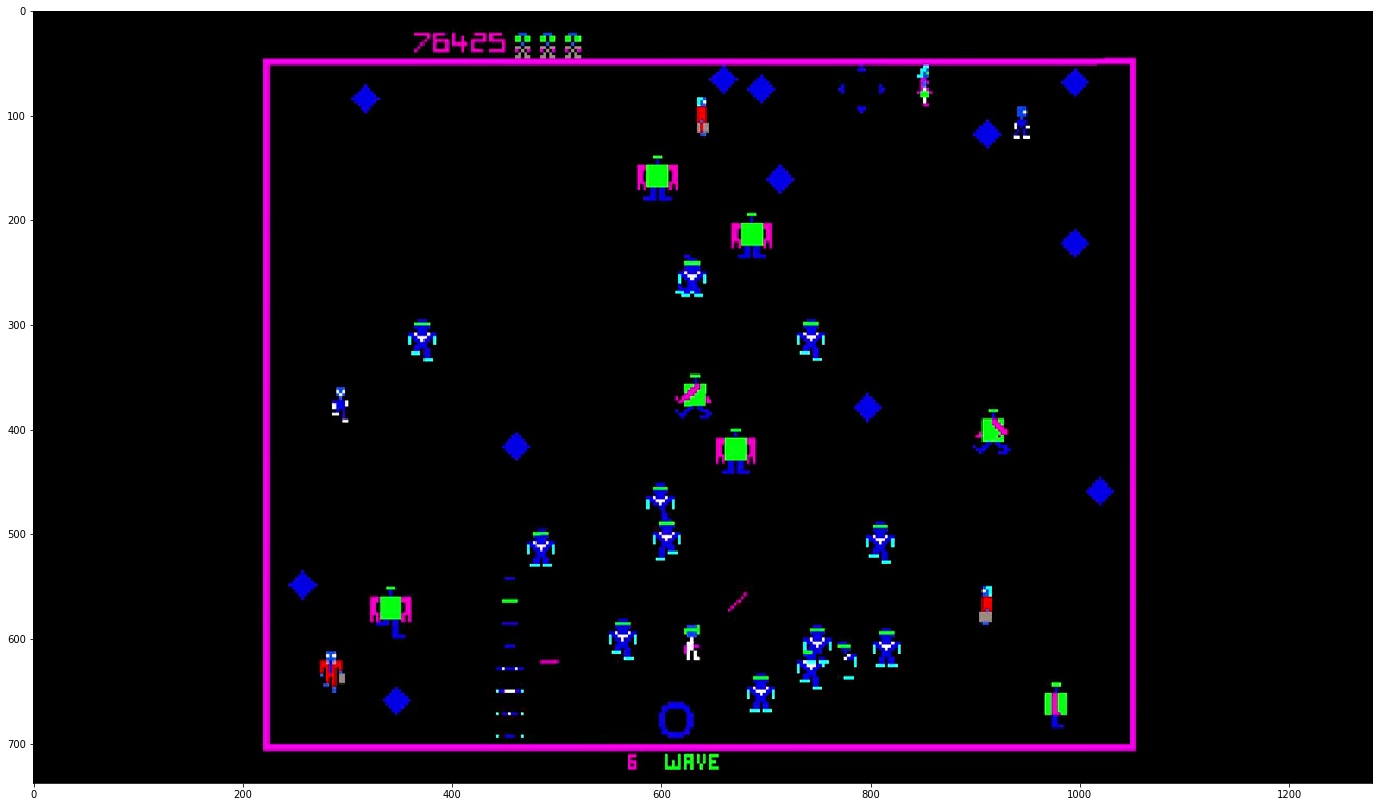

In [2]:
img = cv2.imread("/home/stridera/code/robotron/resources/images/vlcsnap-00001.png", cv2.IMREAD_UNCHANGED)
pyplot.imshow(img)

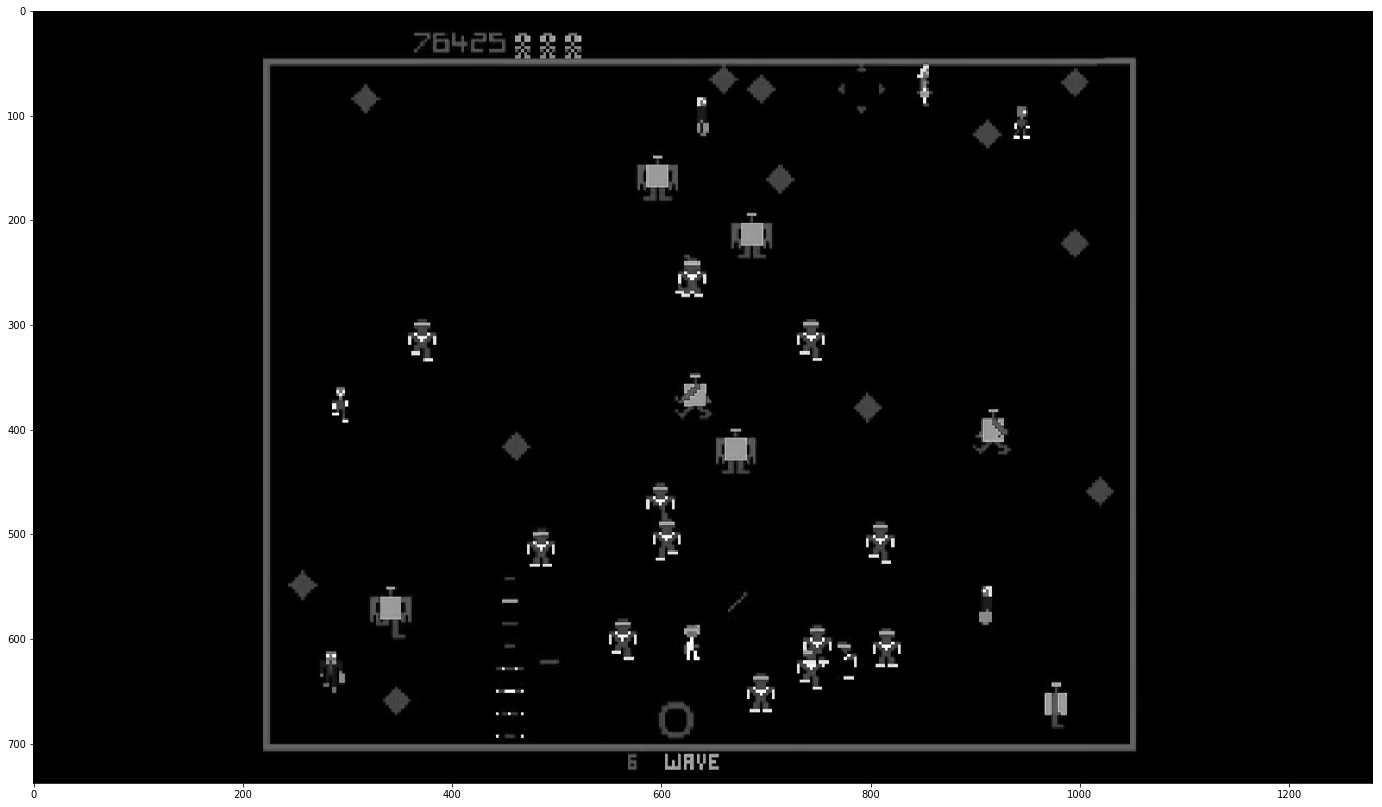

In [47]:
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
pyplot.imshow(imgray, cmap='gray')

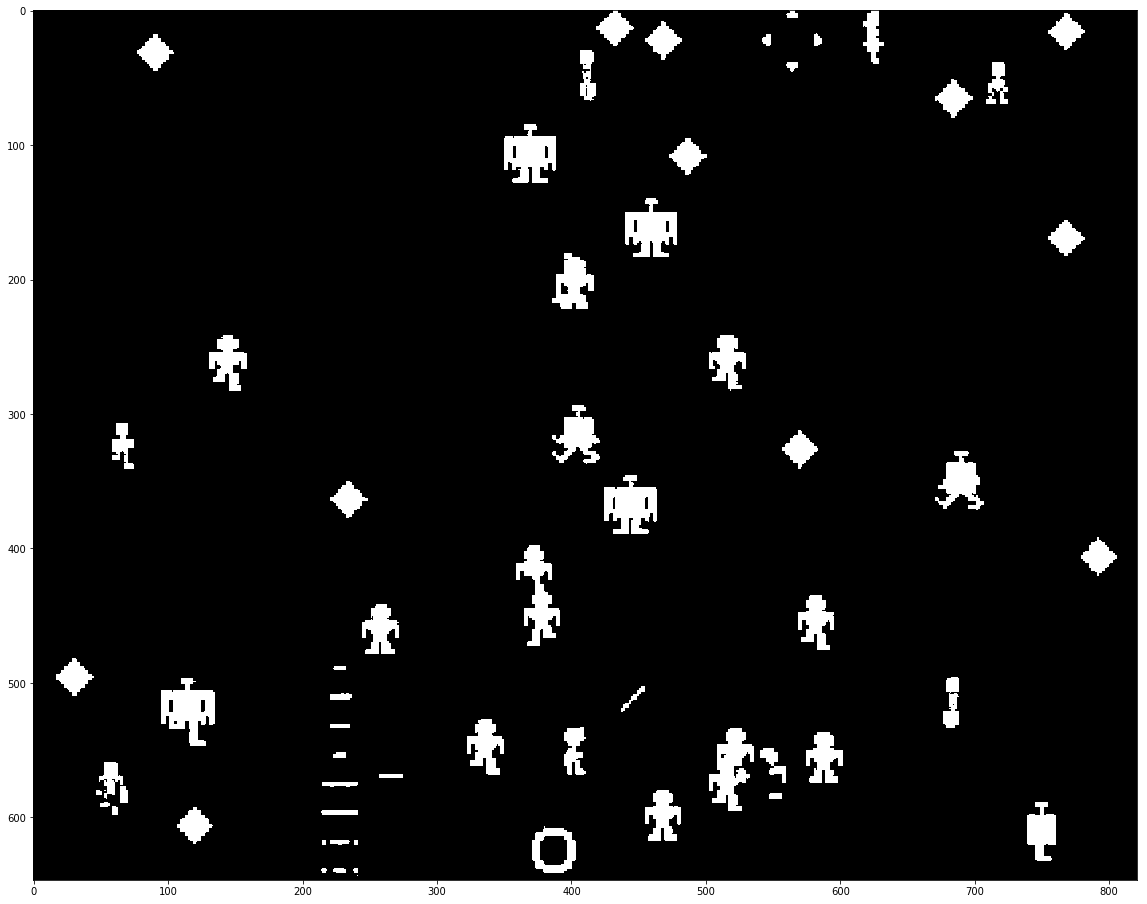

In [149]:
tl, br = [[227, 53], [1048, 700]]
gameboard_image = imgray[tl[1]:br[1], tl[0]:br[0]]
ret, thresh = cv2.threshold(gameboard_image, 27, 255, 0)

pyplot.imshow(thresh, cmap='gray')

In [183]:
im2, contours, hierarchy = cv2.findContours(gameboard_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
marked_image = np.copy(img)
for i in enumerate(contours):
    shifted = np.array(i[1])+tl
    cv2.drawContours(marked_image, shifted, -1, (255,255,255), 3)

In [194]:
marked_image2 = np.copy(img)
#for contour, hier in zip(contours, hierarchy):
for contour in enumerate(contours):
    (x,y,w,h) = cv2.boundingRect(contour[1])
    if h > 15:
        cv2.rectangle(marked_image2, (x+tl[0],y+tl[1]), (x+w+tl[0],y+h+tl[1]), (255, 255, 255), 2)

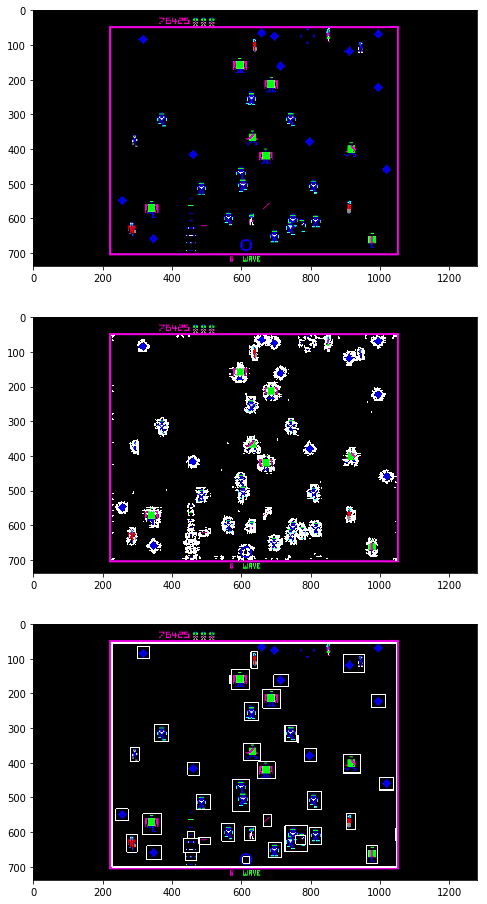

In [195]:
pyplot.subplot(3, 1, 1)
pyplot.imshow(img)
pyplot.subplot(3, 1, 2)
pyplot.imshow(marked_image)
pyplot.subplot(3, 1, 3)
pyplot.imshow(marked_image2)